##Obtaining dataset to clean it.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd

In [27]:
weather = pd.read_csv("/content/drive/MyDrive/CS598 Project/weather_data.csv")

In [28]:
cta_bus_data = pd.read_csv("/content/drive/MyDrive/CS598 Project/cta_bus_data.csv")

In [29]:
divvy_data = pd.read_csv("/content/drive/MyDrive/CS598 Project/202411-divvy-tripdata.csv")

In [30]:
cta_rail_data = pd.read_csv('/content/drive/MyDrive/CS598 Project/cta_rail_data.csv')

##Changing rides to int

In [31]:
cta_bus_data

,route,date,daytype,rides
0,1,11/08/2024,W,700
1,1,11/26/2024,W,910
2,1,11/04/2024,W,"1,070"
3,1,11/22/2024,W,790
4,1,11/05/2024,W,"1,105"
...,...,...,...,...
3376,X9,11/04/2024,W,"4,955"
3377,X9,11/12/2024,W,"6,078"
3378,X9,11/13/2024,W,"6,157"
3379,X9,11/20/2024,W,"5,789"


In [32]:
cta_bus_data['rides'] = cta_bus_data['rides'].str.replace(',', '').astype(int)

Checking for improbable values

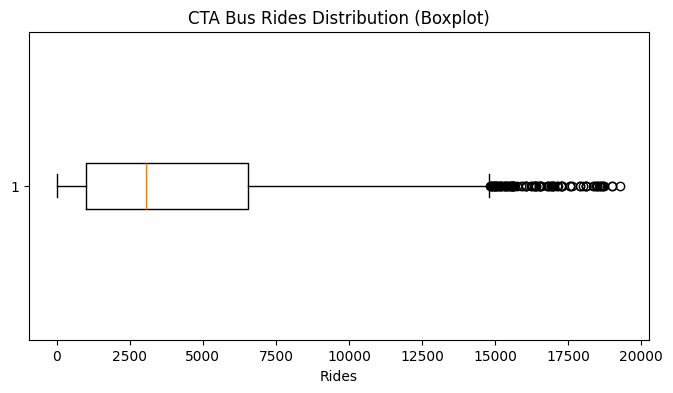

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(cta_bus_data['rides'], vert=False)
plt.title('CTA Bus Rides Distribution (Boxplot)')
plt.xlabel('Rides')
plt.show()

In [34]:
import numpy as np
Q1 = np.percentile(cta_bus_data['rides'], 25)
Q3 = np.percentile(cta_bus_data['rides'], 75)
IQR = Q3 - Q1


whisker_max = Q3 + 1.5 * IQR

non_outlier_max = cta_bus_data['rides'][cta_bus_data['rides'] <= whisker_max].max()
non_outlier_max

14780

In [35]:
outliers_bus = cta_bus_data[cta_bus_data['rides'] > non_outlier_max]
outliers_bus['rides'].sum()

np.int64(1441191)

##Looking at the boxplot, we calculate that the non outlier max is 14780. But too many outliers, so we didn't feel confident dropping all of those values.

In [36]:
# cta_data = cta_data[cta_data['rides'] <= non_outlier_max]

In [37]:
cta_bus_data

,route,date,daytype,rides
0,1,11/08/2024,W,700
1,1,11/26/2024,W,910
2,1,11/04/2024,W,1070
3,1,11/22/2024,W,790
4,1,11/05/2024,W,1105
...,...,...,...,...
3376,X9,11/04/2024,W,4955
3377,X9,11/12/2024,W,6078
3378,X9,11/13/2024,W,6157
3379,X9,11/20/2024,W,5789


In [38]:
cta_bus_data['daytype'].unique()

array(['W', 'U', 'A'], dtype=object)

In [39]:
cta_data_w = cta_bus_data.drop(columns=['daytype'])
cta_data_w

,route,date,rides
0,1,11/08/2024,700
1,1,11/26/2024,910
2,1,11/04/2024,1070
3,1,11/22/2024,790
4,1,11/05/2024,1105
...,...,...,...
3376,X9,11/04/2024,4955
3377,X9,11/12/2024,6078
3378,X9,11/13/2024,6157
3379,X9,11/20/2024,5789


## Drop route column

In [40]:
cta_data_w_no_route = cta_data_w.drop(columns=['route'])
cta_data_w_no_route

,date,rides
0,11/08/2024,700
1,11/26/2024,910
2,11/04/2024,1070
3,11/22/2024,790
4,11/05/2024,1105
...,...,...
3376,11/04/2024,4955
3377,11/12/2024,6078
3378,11/13/2024,6157
3379,11/20/2024,5789


##Sort by date

In [41]:
cta_data_w_no_route_bydate = cta_data_w_no_route.sort_values(by=['date'])
cta_data_w_no_route_bydate

,date,rides
2933,11/01/2024,1760
2180,11/01/2024,758
3303,11/01/2024,7263
1656,11/01/2024,9053
1096,11/01/2024,12898
...,...,...
1006,11/30/2024,501
1320,11/30/2024,1643
161,11/30/2024,525
3011,11/30/2024,1065


##Grouping by date

In [42]:
bus_rides_by_date = cta_data_w_no_route_bydate.groupby('date')['rides'].sum().reset_index()
bus_rides_by_date

,date,rides
0,11/01/2024,615647
1,11/02/2024,409674
2,11/03/2024,266934
3,11/04/2024,550139
4,11/05/2024,517204
5,11/06/2024,628749
6,11/07/2024,640423
7,11/08/2024,598807
8,11/09/2024,389774
9,11/10/2024,304838


##Changing to date-time format AND rides col to bus_rides

In [43]:
bus_rides_by_date['date'] = pd.to_datetime(bus_rides_by_date['date'])
bus_rides_by_date['bus_rides'] = bus_rides_by_date['rides']
bus_rides_by_date = bus_rides_by_date.drop(columns=['rides'])
bus_rides_by_date

,date,bus_rides
0,2024-11-01,615647
1,2024-11-02,409674
2,2024-11-03,266934
3,2024-11-04,550139
4,2024-11-05,517204
5,2024-11-06,628749
6,2024-11-07,640423
7,2024-11-08,598807
8,2024-11-09,389774
9,2024-11-10,304838


#Weather data

In [44]:
weather

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF
0,2021,4,1,0,1.01,0.02,64.80,8.48,100.55,202104
1,2021,4,1,1,0.56,0.05,65.69,8.71,100.58,202104
2,2021,4,1,2,0.07,0.04,66.78,8.84,100.62,202104
3,2021,4,1,3,-0.64,0.05,68.31,8.82,100.68,202104
4,2021,4,1,4,-1.39,0.05,69.78,8.81,100.76,202104
...,...,...,...,...,...,...,...,...,...,...
37975,2025,7,31,19,22.20,0.00,73.38,7.74,100.11,202507
37976,2025,7,31,20,22.12,0.00,75.20,7.29,100.15,202507
37977,2025,7,31,21,22.11,0.00,76.10,6.69,100.18,202507
37978,2025,7,31,22,22.05,0.00,75.14,6.16,100.21,202507


In [45]:
print(weather.dtypes)

YEAR           int64
MO             int64
DY             int64
HR             int64
TEMP         float64
PRCP         float64
HMDT         float64
WND_SPD      float64
ATM_PRESS    float64
REF            int64
dtype: object


## Keeping only November 2024 Data

In [46]:
weather = weather[weather['YEAR'] == 2024]
weather = weather[weather['MO'] == 11]
weather

,YEAR,MO,DY,HR,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,REF
31428,2024,11,1,0,7.29,0.03,81.89,11.03,99.68,202411
31429,2024,11,1,1,7.40,0.05,82.42,10.36,99.76,202411
31430,2024,11,1,2,7.48,0.07,82.48,9.47,99.82,202411
31431,2024,11,1,3,7.45,0.07,82.40,8.51,99.89,202411
31432,2024,11,1,4,7.31,0.03,82.34,7.69,99.98,202411
...,...,...,...,...,...,...,...,...,...,...
32143,2024,11,30,19,-2.34,0.00,71.35,8.67,99.82,202411
32144,2024,11,30,20,-2.62,0.00,74.02,8.50,99.82,202411
32145,2024,11,30,21,-3.01,0.00,76.83,8.45,99.84,202411
32146,2024,11,30,22,-3.49,0.00,80.03,8.47,99.86,202411


In [47]:
weather = weather.drop(columns=['REF'])

##Aggregated all the weather data by day (mean of each day)

In [48]:
weather_daily = (
    weather
    .groupby(['YEAR', 'MO', 'DY'], as_index=False)
    .agg({
        'TEMP': 'mean',
        'PRCP': 'mean',
        'HMDT': 'mean',
        'WND_SPD': 'mean',
        'ATM_PRESS': 'mean'
    })
)

In [49]:
weather_daily

,YEAR,MO,DY,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS
0,2024,11,1,8.833333,0.011250,67.349167,4.452500,100.272500
1,2024,11,2,10.706667,0.000000,68.865833,4.281250,100.589583
2,2024,11,3,13.902500,1.315833,70.218333,8.925417,99.671250
3,2024,11,4,16.772500,21.297917,93.483333,7.697917,98.948750
4,2024,11,5,16.908750,19.392083,91.646667,9.087917,98.472083
5,2024,11,6,11.991250,0.107500,82.190000,4.570833,99.597917
6,2024,11,7,11.135417,0.007083,71.699167,4.056667,100.370000
7,2024,11,8,11.313750,0.000000,75.232500,5.717083,100.259583
8,2024,11,9,11.719583,0.751667,69.151250,7.003750,100.037500
9,2024,11,10,12.514583,6.032917,81.762917,7.502500,98.867917


In [50]:
weather_daily.columns

Index(['YEAR', 'MO', 'DY', 'TEMP', 'PRCP', 'HMDT', 'WND_SPD', 'ATM_PRESS'], dtype='object')

##Change format to pandas datetime format

In [51]:
weather_daily['date'] = pd.to_datetime(
    weather_daily[['YEAR', 'MO', 'DY']].rename(
        columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}
    )
)
weather_daily

,YEAR,MO,DY,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,date
0,2024,11,1,8.833333,0.011250,67.349167,4.452500,100.272500,2024-11-01
1,2024,11,2,10.706667,0.000000,68.865833,4.281250,100.589583,2024-11-02
2,2024,11,3,13.902500,1.315833,70.218333,8.925417,99.671250,2024-11-03
3,2024,11,4,16.772500,21.297917,93.483333,7.697917,98.948750,2024-11-04
4,2024,11,5,16.908750,19.392083,91.646667,9.087917,98.472083,2024-11-05
5,2024,11,6,11.991250,0.107500,82.190000,4.570833,99.597917,2024-11-06
6,2024,11,7,11.135417,0.007083,71.699167,4.056667,100.370000,2024-11-07
7,2024,11,8,11.313750,0.000000,75.232500,5.717083,100.259583,2024-11-08
8,2024,11,9,11.719583,0.751667,69.151250,7.003750,100.037500,2024-11-09
9,2024,11,10,12.514583,6.032917,81.762917,7.502500,98.867917,2024-11-10


###Drop columns

In [52]:
weather_daily.drop(columns=['YEAR', 'MO', 'DY'], inplace=True)

In [53]:
weather_daily

,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,date
0,8.833333,0.011250,67.349167,4.452500,100.272500,2024-11-01
1,10.706667,0.000000,68.865833,4.281250,100.589583,2024-11-02
2,13.902500,1.315833,70.218333,8.925417,99.671250,2024-11-03
3,16.772500,21.297917,93.483333,7.697917,98.948750,2024-11-04
4,16.908750,19.392083,91.646667,9.087917,98.472083,2024-11-05
5,11.991250,0.107500,82.190000,4.570833,99.597917,2024-11-06
6,11.135417,0.007083,71.699167,4.056667,100.370000,2024-11-07
7,11.313750,0.000000,75.232500,5.717083,100.259583,2024-11-08
8,11.719583,0.751667,69.151250,7.003750,100.037500,2024-11-09
9,12.514583,6.032917,81.762917,7.502500,98.867917,2024-11-10


##Merging bus and weather data

In [54]:
bus_weather_merge = pd.merge(bus_rides_by_date, weather_daily, on='date', how='inner')
bus_weather_merge

,date,bus_rides,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS
0,2024-11-01,615647,8.833333,0.011250,67.349167,4.452500,100.272500
1,2024-11-02,409674,10.706667,0.000000,68.865833,4.281250,100.589583
2,2024-11-03,266934,13.902500,1.315833,70.218333,8.925417,99.671250
3,2024-11-04,550139,16.772500,21.297917,93.483333,7.697917,98.948750
4,2024-11-05,517204,16.908750,19.392083,91.646667,9.087917,98.472083
5,2024-11-06,628749,11.991250,0.107500,82.190000,4.570833,99.597917
6,2024-11-07,640423,11.135417,0.007083,71.699167,4.056667,100.370000
7,2024-11-08,598807,11.313750,0.000000,75.232500,5.717083,100.259583
8,2024-11-09,389774,11.719583,0.751667,69.151250,7.003750,100.037500
9,2024-11-10,304838,12.514583,6.032917,81.762917,7.502500,98.867917


#Divvy data

In [55]:
divvy_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,578DDD7CE1771FFA,classic_bike,2024-11-07 19:21:58.206,2024-11-07 19:28:57.301,Walsh Park,18067,Leavitt St & North Ave,TA1308000005,41.914610,-87.667968,41.910533,-87.682308,member
1,78B141C50102ABA6,classic_bike,2024-11-22 14:49:00.431,2024-11-22 14:56:15.475,Walsh Park,18067,Leavitt St & Armitage Ave,TA1309000029,41.914610,-87.667968,41.917805,-87.682437,member
2,1E794CF36394E2D7,classic_bike,2024-11-08 09:24:00.238,2024-11-08 09:28:33.480,Walsh Park,18067,Damen Ave & Cortland St,13133,41.914610,-87.667968,41.915983,-87.677335,member
3,E5DD2CAB58D73F98,classic_bike,2024-11-24 17:51:14.144,2024-11-24 18:05:32.574,Clark St & Elm St,TA1307000039,Clark St & Drummond Pl,TA1307000142,41.902973,-87.631280,41.931248,-87.644336,member
4,57F9878BC8C765F1,classic_bike,2024-11-04 14:59:16.032,2024-11-04 15:41:02.456,Clark St & Wellington Ave,TA1307000136,Streeter Dr & Grand Ave,13022,41.936497,-87.647539,41.892278,-87.612043,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335070,6F18BF26B4BFBA75,electric_bike,2024-11-21 08:06:58.538,2024-11-21 08:12:14.548,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
335071,4FC0C36143D89998,electric_bike,2024-11-09 14:51:37.776,2024-11-09 14:55:36.959,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
335072,8E244ADE5B1653D4,electric_bike,2024-11-23 16:02:26.958,2024-11-23 16:05:25.961,Desplaines St & Kinzie St,TA1306000003,Morgan St & Lake St*,chargingstx4,41.888716,-87.644448,41.885492,-87.652289,member
335073,65F9D9F5648FAC03,electric_bike,2024-11-05 13:30:34.901,2024-11-05 13:40:07.211,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member


In [56]:
types = divvy_data['rideable_type'].unique()
types

array(['classic_bike', 'electric_bike'], dtype=object)

##Dropping ended_at and removing time stamps (we only care about date)

In [57]:
divvy_data = divvy_data.drop(columns=['ended_at'])
divvy_data['started_at'] = pd.to_datetime(divvy_data['started_at']).dt.date
divvy_data

,ride_id,rideable_type,started_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,578DDD7CE1771FFA,classic_bike,2024-11-07,Walsh Park,18067,Leavitt St & North Ave,TA1308000005,41.914610,-87.667968,41.910533,-87.682308,member
1,78B141C50102ABA6,classic_bike,2024-11-22,Walsh Park,18067,Leavitt St & Armitage Ave,TA1309000029,41.914610,-87.667968,41.917805,-87.682437,member
2,1E794CF36394E2D7,classic_bike,2024-11-08,Walsh Park,18067,Damen Ave & Cortland St,13133,41.914610,-87.667968,41.915983,-87.677335,member
3,E5DD2CAB58D73F98,classic_bike,2024-11-24,Clark St & Elm St,TA1307000039,Clark St & Drummond Pl,TA1307000142,41.902973,-87.631280,41.931248,-87.644336,member
4,57F9878BC8C765F1,classic_bike,2024-11-04,Clark St & Wellington Ave,TA1307000136,Streeter Dr & Grand Ave,13022,41.936497,-87.647539,41.892278,-87.612043,casual
...,...,...,...,...,...,...,...,...,...,...,...,...
335070,6F18BF26B4BFBA75,electric_bike,2024-11-21,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
335071,4FC0C36143D89998,electric_bike,2024-11-09,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member
335072,8E244ADE5B1653D4,electric_bike,2024-11-23,Desplaines St & Kinzie St,TA1306000003,Morgan St & Lake St*,chargingstx4,41.888716,-87.644448,41.885492,-87.652289,member
335073,65F9D9F5648FAC03,electric_bike,2024-11-05,Desplaines St & Kinzie St,TA1306000003,LaSalle St & Washington St,13006,41.888716,-87.644448,41.882664,-87.632530,member


##Finding number of divvy users per day in november

In [58]:
bike_rides_by_date = divvy_data.groupby('started_at').size().reset_index(name='ride_count')
bike_rides_by_date

,started_at,ride_count
0,2024-10-30,2
1,2024-10-31,44
2,2024-11-01,15162
3,2024-11-02,15325
4,2024-11-03,11258
5,2024-11-04,13268
6,2024-11-05,10621
7,2024-11-06,15668
8,2024-11-07,16627
9,2024-11-08,16121


##removing october data

In [59]:
bike_rides_by_date['started_at'] = pd.to_datetime(bike_rides_by_date['started_at'])
bike_rides_by_date = bike_rides_by_date[bike_rides_by_date['started_at'] >= pd.to_datetime('2024-11-01')]
bike_rides_by_date

,started_at,ride_count
2,2024-11-01,15162
3,2024-11-02,15325
4,2024-11-03,11258
5,2024-11-04,13268
6,2024-11-05,10621
7,2024-11-06,15668
8,2024-11-07,16627
9,2024-11-08,16121
10,2024-11-09,11607
11,2024-11-10,12744


##Renaming Columns

In [60]:
bike_rides_by_date['date'] = bike_rides_by_date['started_at']
bike_rides_by_date = bike_rides_by_date.drop(columns=['started_at'])

bike_rides_by_date['divvy_rides'] = bike_rides_by_date['ride_count']
bike_rides_by_date = bike_rides_by_date.drop(columns=['ride_count'])
bike_rides_by_date

/tmp/ipython-input-4259727523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_rides_by_date['date'] = bike_rides_by_date['started_at']


,date,divvy_rides
2,2024-11-01,15162
3,2024-11-02,15325
4,2024-11-03,11258
5,2024-11-04,13268
6,2024-11-05,10621
7,2024-11-06,15668
8,2024-11-07,16627
9,2024-11-08,16121
10,2024-11-09,11607
11,2024-11-10,12744


#CTA Rail

In [61]:
cta_rail_data

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,11/01/2024,W,655
1,40020,Harlem-Lake,11/01/2024,W,"2,106"
2,40030,Pulaski-Lake,11/01/2024,W,946
3,40040,Quincy/Wells,11/01/2024,W,"3,161"
4,40050,Davis,11/01/2024,W,"1,823"
...,...,...,...,...,...
4459,41670,Conservatory,12/01/2024,U,276
4460,41680,Oakton-Skokie,12/01/2024,U,165
4461,41690,Cermak-McCormick Place,12/01/2024,U,741
4462,41700,Washington/Wabash,12/01/2024,U,"2,717"


##changing rides to int

In [62]:
cta_rail_data['rides'] = cta_rail_data['rides'].str.replace(',', '').astype(int)

##Changing to date-time format

In [63]:
cta_rail_data['date'] = pd.to_datetime(cta_rail_data['date'])
cta_rail_data

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2024-11-01,W,655
1,40020,Harlem-Lake,2024-11-01,W,2106
2,40030,Pulaski-Lake,2024-11-01,W,946
3,40040,Quincy/Wells,2024-11-01,W,3161
4,40050,Davis,2024-11-01,W,1823
...,...,...,...,...,...
4459,41670,Conservatory,2024-12-01,U,276
4460,41680,Oakton-Skokie,2024-12-01,U,165
4461,41690,Cermak-McCormick Place,2024-12-01,U,741
4462,41700,Washington/Wabash,2024-12-01,U,2717


##Aggregating rides by date

In [64]:
train_rides_by_date = cta_rail_data.groupby('date')['rides'].sum().reset_index()
train_rides_by_date

,date,rides
0,2024-11-01,326053
1,2024-11-02,239130
2,2024-11-03,195095
3,2024-11-04,327279
4,2024-11-05,323771
5,2024-11-06,365520
6,2024-11-07,384894
7,2024-11-08,338444
8,2024-11-09,245573
9,2024-11-10,198976


##Removing non-november date

In [65]:
train_rides_by_date = train_rides_by_date[train_rides_by_date['date'] <= pd.to_datetime('2024-11-30')]
train_rides_by_date

,date,rides
0,2024-11-01,326053
1,2024-11-02,239130
2,2024-11-03,195095
3,2024-11-04,327279
4,2024-11-05,323771
5,2024-11-06,365520
6,2024-11-07,384894
7,2024-11-08,338444
8,2024-11-09,245573
9,2024-11-10,198976


##Checking for outliers using boxplot

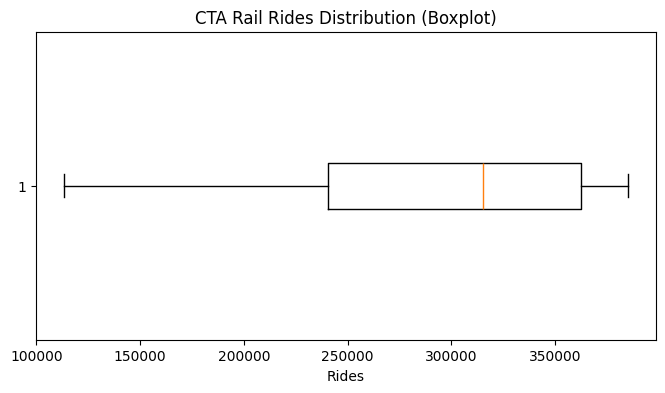

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.boxplot(train_rides_by_date['rides'], vert=False)
plt.title('CTA Rail Rides Distribution (Boxplot)')
plt.xlabel('Rides')
plt.show()

##No outliers!!

##CHANGING RIDES TO RAIL_RIDES

In [67]:
train_rides_by_date['rail_rides'] = train_rides_by_date['rides']
train_rides_by_date = train_rides_by_date.drop(columns=['rides'])
train_rides_by_date

/tmp/ipython-input-2850529155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rides_by_date['rail_rides'] = train_rides_by_date['rides']


,date,rail_rides
0,2024-11-01,326053
1,2024-11-02,239130
2,2024-11-03,195095
3,2024-11-04,327279
4,2024-11-05,323771
5,2024-11-06,365520
6,2024-11-07,384894
7,2024-11-08,338444
8,2024-11-09,245573
9,2024-11-10,198976


#Merging divvy and rail

In [68]:
divvy_rail_merge = pd.merge(bike_rides_by_date, train_rides_by_date, on='date', how='inner')
divvy_rail_merge

,date,divvy_rides,rail_rides
0,2024-11-01,15162,326053
1,2024-11-02,15325,239130
2,2024-11-03,11258,195095
3,2024-11-04,13268,327279
4,2024-11-05,10621,323771
5,2024-11-06,15668,365520
6,2024-11-07,16627,384894
7,2024-11-08,16121,338444
8,2024-11-09,11607,245573
9,2024-11-10,12744,198976


##Merging bus_weather_merge and divvy_rail_merge

In [69]:
final_merge = pd.merge(bus_weather_merge, divvy_rail_merge, on='date', how='inner')
final_merge

,date,bus_rides,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS,divvy_rides,rail_rides
0,2024-11-01,615647,8.833333,0.011250,67.349167,4.452500,100.272500,15162,326053
1,2024-11-02,409674,10.706667,0.000000,68.865833,4.281250,100.589583,15325,239130
2,2024-11-03,266934,13.902500,1.315833,70.218333,8.925417,99.671250,11258,195095
3,2024-11-04,550139,16.772500,21.297917,93.483333,7.697917,98.948750,13268,327279
4,2024-11-05,517204,16.908750,19.392083,91.646667,9.087917,98.472083,10621,323771
5,2024-11-06,628749,11.991250,0.107500,82.190000,4.570833,99.597917,15668,365520
6,2024-11-07,640423,11.135417,0.007083,71.699167,4.056667,100.370000,16627,384894
7,2024-11-08,598807,11.313750,0.000000,75.232500,5.717083,100.259583,16121,338444
8,2024-11-09,389774,11.719583,0.751667,69.151250,7.003750,100.037500,11607,245573
9,2024-11-10,304838,12.514583,6.032917,81.762917,7.502500,98.867917,12744,198976


##Reordering some columns

In [71]:
final_merge = final_merge[['date', 'bus_rides', 'rail_rides', 'divvy_rides', 'TEMP', 'PRCP', 'HMDT', 'WND_SPD', 'ATM_PRESS']]
final_merge

,date,bus_rides,rail_rides,divvy_rides,TEMP,PRCP,HMDT,WND_SPD,ATM_PRESS
0,2024-11-01,615647,326053,15162,8.833333,0.011250,67.349167,4.452500,100.272500
1,2024-11-02,409674,239130,15325,10.706667,0.000000,68.865833,4.281250,100.589583
2,2024-11-03,266934,195095,11258,13.902500,1.315833,70.218333,8.925417,99.671250
3,2024-11-04,550139,327279,13268,16.772500,21.297917,93.483333,7.697917,98.948750
4,2024-11-05,517204,323771,10621,16.908750,19.392083,91.646667,9.087917,98.472083
5,2024-11-06,628749,365520,15668,11.991250,0.107500,82.190000,4.570833,99.597917
6,2024-11-07,640423,384894,16627,11.135417,0.007083,71.699167,4.056667,100.370000
7,2024-11-08,598807,338444,16121,11.313750,0.000000,75.232500,5.717083,100.259583
8,2024-11-09,389774,245573,11607,11.719583,0.751667,69.151250,7.003750,100.037500
9,2024-11-10,304838,198976,12744,12.514583,6.032917,81.762917,7.502500,98.867917


In [72]:
final_merge.to_csv('/content/drive/MyDrive/CS598 Project/final_merge.csv', index=False)